# Linear Regression: Strengths and Weaknesses

## 1. Learning Goals

By the end of this notebook, you will be able to:

- **Understand what Linear Regression is and how it works**  
  You'll learn how a computer can draw a best-fit line through data points to make predictions.  

- **See how well Linear Regression performs in different situations**  
  We'll test the model on both clean and noisy datasets to see when it does well and when it struggles.

- **Explore why Linear Regression is often a good starting point**  
  You'll experience how fast and easy it is to use and why it's still used in many real-world applications despite being simple.

- **Recognize the model's limitations**  
  You'll observe what happens when there are outliers (strange or extreme data points) or when the data pattern is non-linear — and understand why Linear Regression might not be the best choice in such cases.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# For reproducibility
np.random.seed(0)

## 2. Fitting a Line Through Data

In this example, we used Linear Regression to draw a straight line that best fits a cloud of data points. The data itself is synthetic — we generated it so that the true relationship between the input `X` and output `y` is roughly linear but with some added noise. Despite this noise, the model can find a clear upward trend and represent it as a red line.

What makes this approach powerful is its simplicity and intuitiveness. The model assumes that the relationship between input and output can be captured with a straight line, and it finds the line that minimizes the average squared error between predictions and actual values. This makes it not only computationally efficient but also extremely easy to interpret: you can look at the slope and intercept and immediately understand the direction and strength of the relationship.

Because of this, Linear Regression is often the first algorithm data scientists use when exploring a dataset. It serves as a reliable baseline and a quick way to check if there’s a linear trend present. Even when it’s not the final model you use, it helps build intuition and guide further analysis. In short, it’s a great starting point that strikes a balance between performance, speed, and clarity.

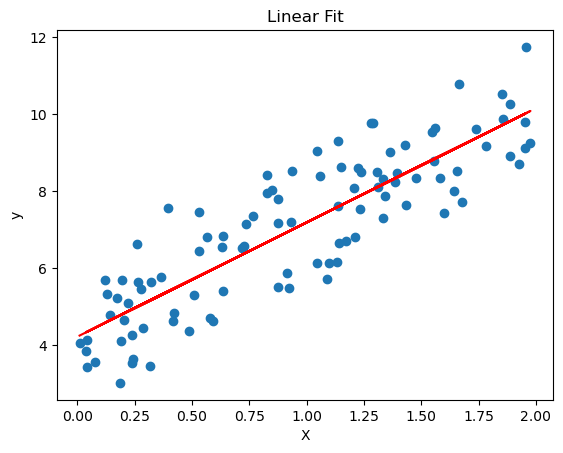

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X), color='red')
plt.title("Linear Fit")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

✅ **Strength**: Interpretable and efficient. Easy to visualize and understand.

## 3. Sensitivity to Outliers

In this section, we added just one extreme data point — an outlier — far away from the rest of the data. This small change caused a large shift in the regression line. As you can see in the plot, the orange line (fitted with the outlier) is noticeably different from the original red line.

This illustrates one of the key weaknesses of Linear Regression: it is highly sensitive to outliers. Because the model tries to minimize the sum of squared errors, a single data point with a large error can dominate the overall loss function, pulling the line away from where it should be.

In real-world datasets, outliers are common — they can be due to errors, noise, or rare but real events. If we don't handle them properly (e.g., through data cleaning or robust models), they can significantly distort the model's predictions and reduce overall reliability.

This behavior shows why it's important to always **visualize your data**, check for outliers, and consider whether a different modeling approach (like robust regression or tree-based models) might be more appropriate when extreme values are present.

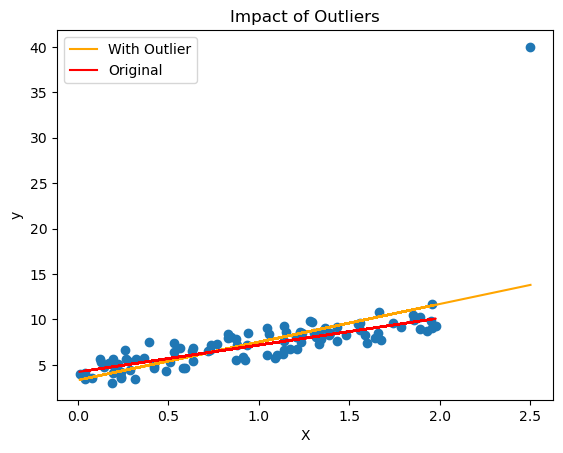

In [26]:
X_out = np.vstack([X, [[2.5]]])
y_out = np.vstack([y, [[40]]])  # Add a strong outlier

lin_reg_out = LinearRegression().fit(X_out, y_out)

plt.scatter(X_out, y_out)
plt.plot(X_out, lin_reg_out.predict(X_out), color='orange', label="With Outlier")
plt.plot(X, lin_reg.predict(X), color='red', label="Original")
plt.legend()
plt.title("Impact of Outliers")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

⚠️ **Weakness**: Sensitive to outliers, which can skew the model significantly.

## 4. Polynomial Regression

Sometimes, the relationship between the input features and the target variable is not perfectly linear. In this example, although the data is mostly increasing, it curves slightly — and a straight line struggles to follow that curve.

By using `PolynomialFeatures`, we can transform the input `X` into a higher-dimensional space (e.g., adding squared and cubic terms). This allows Linear Regression to fit more flexible curves to the data. In our case, we used a degree-3 polynomial, which creates a smooth curve that captures the trend better than a straight line.

This technique demonstrates a key **strength** of linear regression when combined with polynomial features: it becomes capable of modeling non-linear relationships while still using the same simple optimization techniques.

However, this power comes with a cost. As the polynomial degree increases, the model can become overly complex and start fitting the noise in the data instead of the actual signal. This phenomenon is called **overfitting**. It leads to poor performance on new, unseen data even if the training error is low.

That’s why it’s important to strike a balance — using just enough complexity to capture the real structure of the data, but not so much that the model memorizes every bump and outlier.

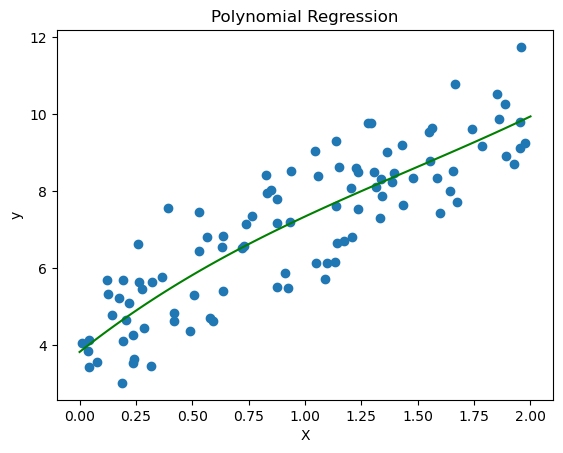

In [3]:
# You can increase the degree (e.g., degree=9) to observe overfitting behavior
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

lin_poly = LinearRegression().fit(X_poly, y)

plt.scatter(X, y)
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
plt.plot(X_range, lin_poly.predict(X_range_poly), color='green')
plt.title("Polynomial Regression")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

✅ **Strength**: Can model non-linear patterns.

⚠️ **Weakness**: Risk of overfitting with high-degree polynomials.

## 5. Regularization (Ridge vs Lasso)

In the previous section, we saw how increasing the degree of polynomial regression can lead to overfitting—where the model fits the training data too closely, failing to generalize well to unseen data.

Regularization techniques such as **Ridge Regression** and **Lasso Regression** introduce penalties on the magnitude of the model's coefficients, helping to prevent this overfitting.

- **Ridge Regression** (L2 penalty) shrinks coefficients but retains all features.
- **Lasso Regression** (L1 penalty) can shrink some coefficients to exactly zero, effectively performing feature selection.

Below, we apply these techniques to a 9-degree polynomial regression model, trained on a sinusoidal dataset. Observe how Ridge and Lasso lead to smoother, less overfit curves compared to unregularized polynomial regression.


D:\miniconda3\envs\ud-ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e+01, tolerance: 3.922e-02
  model = cd_fast.enet_coordinate_descent(


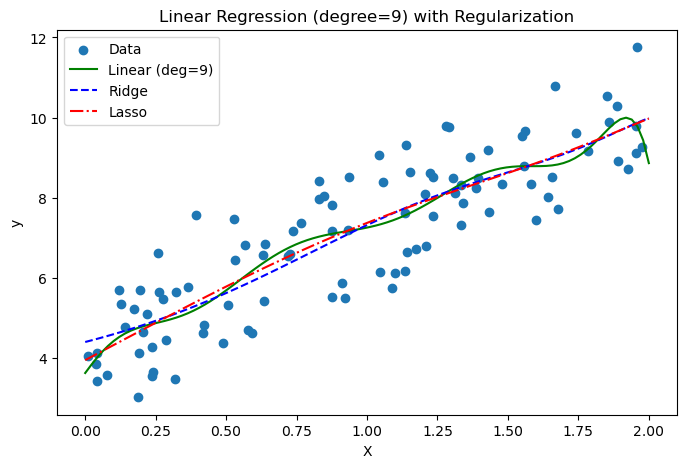

In [4]:
poly = PolynomialFeatures(degree=9)
X_poly = poly.fit_transform(X)

# 1. Linear Regression
lin_poly = LinearRegression().fit(X_poly, y)

# 2. Ridge Regression
ridge_poly = Ridge(alpha=1.0).fit(X_poly, y)

# 3. Lasso Regression
lasso_poly = Lasso(alpha=1e-3, max_iter=10000).fit(X_poly, y)

# Plotting
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, label='Data')

plt.plot(X_range, lin_poly.predict(X_range_poly), label="Linear (deg=9)", color='green')
plt.plot(X_range, ridge_poly.predict(X_range_poly), label="Ridge", linestyle='--', color='blue')
plt.plot(X_range, lasso_poly.predict(X_range_poly), label="Lasso", linestyle='-.', color='red')

plt.title("Linear Regression (degree=9) with Regularization")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


To better understand how **regularization affects model complexity**, we'll visualize the **learned coefficients** from both Ridge and Lasso regression.

- Each **dot** represents the weight (coefficient) assigned to a polynomial feature.
- **Ridge** shrinks all weights but keeps them non-zero.
- **Lasso**, in contrast, can **shrink some coefficients to exactly zero**, effectively removing them from the model.

This plot helps us see how each technique applies its penalty and why Lasso is known for feature selection.

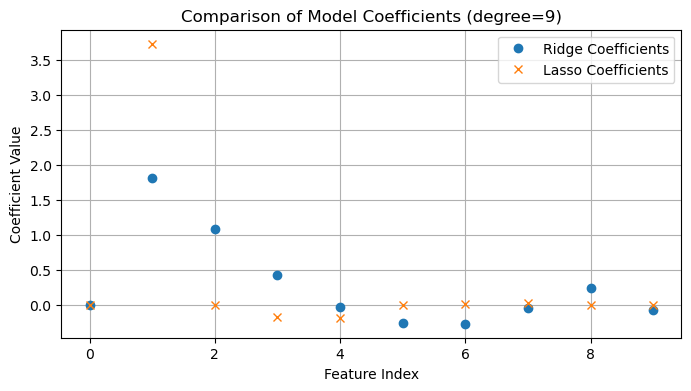

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(ridge_poly.coef_, 'o', label='Ridge Coefficients')
plt.plot(lasso_poly.coef_, 'x', label='Lasso Coefficients')
plt.title("Comparison of Model Coefficients (degree=9)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()

✅ **Strength**: Regularization helps reduce overfitting.

⚠️ **Weakness**: Requires careful tuning of hyperparameters (alpha).

## 6. Summary and Reflection

Let’s take a moment to reflect on what you’ve explored.

You’ve seen how Linear Regression works when the relationship between variables is mostly linear, and how easily it can be visualized and implemented. It’s clear that Linear Regression performs well when the data is relatively clean, the relationship is roughly linear, and the number of features is not too high.

However, through the experiments, you also observed some limitations. For example, a single outlier can drastically shift the regression line, and simple linear models can’t capture non-linear trends unless we explicitly introduce polynomial terms. Even then, the model might overfit — especially if the polynomial degree is too high.

Now, think about the kinds of problems where you might consider switching to alternative models like Decision Trees, Random Forests, or Support Vector Machines. Would Linear Regression still be a good choice if your data had strong interactions, categorical features, or nonlinear boundaries?

Try to answer these questions for yourself:

- When does Linear Regression perform well?
- What limitations did you observe?
- In what scenarios might you consider using other models instead?

These questions will help you decide when Linear Regression is appropriate and when you should look elsewhere.